In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential 
from tensorflow.keras.layers import Dense, Conv2D, Flatten, BatchNormalization, MaxPooling2D, Dropout
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
# Load CIFAR-10 dataset and preprocess the data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)


In [3]:
# Build the CNN model
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())  # Add BatchNormalization after the first Conv2D layer
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))  # Add Dropout after the first BatchNormalization layer

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())  # Add BatchNormalization after the second Conv2D layer
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))  # Add Dropout after the second BatchNormalization layer

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())  # Add BatchNormalization after the third Conv2D layer
model.add(Dropout(0.25))  # Add Dropout after the third BatchNormalization layer

# Dense layers
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # Add Dropout before the final output layer

model.add(Dense(10, activation='softmax'))  # 10 output classes for CIFAR-10

# Compile the model
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 13, 13, 64)       2

In [4]:
# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,          # Randomly rotate images by 15 degrees
    width_shift_range=0.1,      # Randomly shift images horizontally by 10% of the width
    height_shift_range=0.1,     # Randomly shift images vertically by 10% of the height
    horizontal_flip=True,       # Randomly flip images horizontally
    zoom_range=0.1              # Randomly zoom images by 10%
)

In [5]:
# Train the model using the validation set for monitoring
batch_size = 300
epochs = 100
# history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val), verbose=1)

# Calculate the number of steps per epoch
steps_per_epoch = len(x_train) // batch_size

history = model.fit(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=(x_val, y_val),
    verbose=1
)

Epoch 1/100
150/150 [==============================] - 21s 95ms/step - loss: 2.9765 - accuracy: 0.1674 - val_loss: 2.7578 - val_accuracy: 0.1004
Epoch 2/100
150/150 [==============================] - 14s 93ms/step - loss: 2.4257 - accuracy: 0.2252 - val_loss: 2.6546 - val_accuracy: 0.1264
Epoch 3/100
150/150 [==============================] - 14s 93ms/step - loss: 2.1993 - accuracy: 0.2550 - val_loss: 2.1257 - val_accuracy: 0.2366
Epoch 4/100
150/150 [==============================] - 14s 91ms/step - loss: 2.0693 - accuracy: 0.2752 - val_loss: 1.6936 - val_accuracy: 0.3822
Epoch 5/100
150/150 [==============================] - 13s 89ms/step - loss: 1.9717 - accuracy: 0.2978 - val_loss: 1.6012 - val_accuracy: 0.4116
Epoch 6/100
150/150 [==============================] - 13s 89ms/step - loss: 1.9076 - accuracy: 0.3108 - val_loss: 1.5554 - val_accuracy: 0.4320
Epoch 7/100
150/150 [==============================] - 14s 92ms/step - loss: 1.8545 - accuracy: 0.3273 - val_loss: 1.5407 - val_ac

In [6]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, batch_size=batch_size)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

34/34 [==============================] - 0s 10ms/step - loss: 0.9447 - accuracy: 0.6692
Test Loss: 0.9446871876716614
Test Accuracy: 0.6692000031471252


In [7]:
# plotting helper function
def plothist(hist):
    plt.rcParams["figure.figsize"] = (16, 8)
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.grid()
    plt.show()

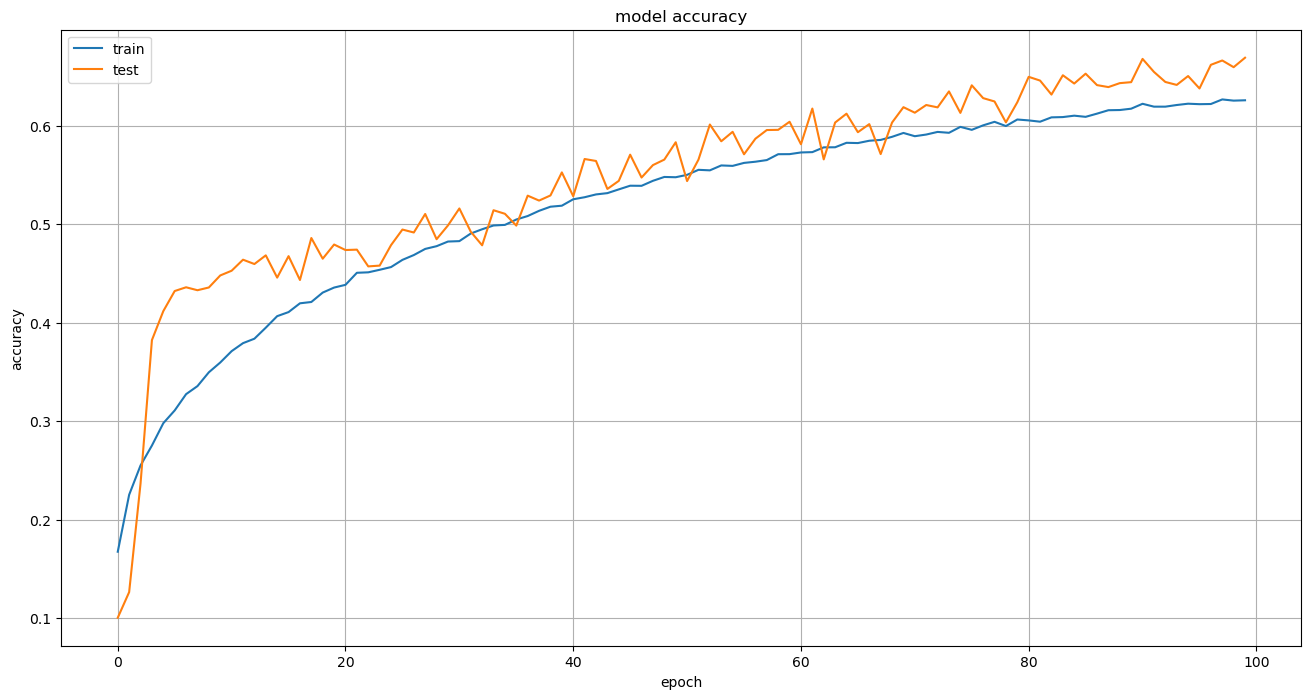

In [8]:
plothist(history)

In [9]:
# plotting helper function
def plothist_loss(hist):
    plt.rcParams["figure.figsize"] = (16, 8)
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.grid()
    plt.show()

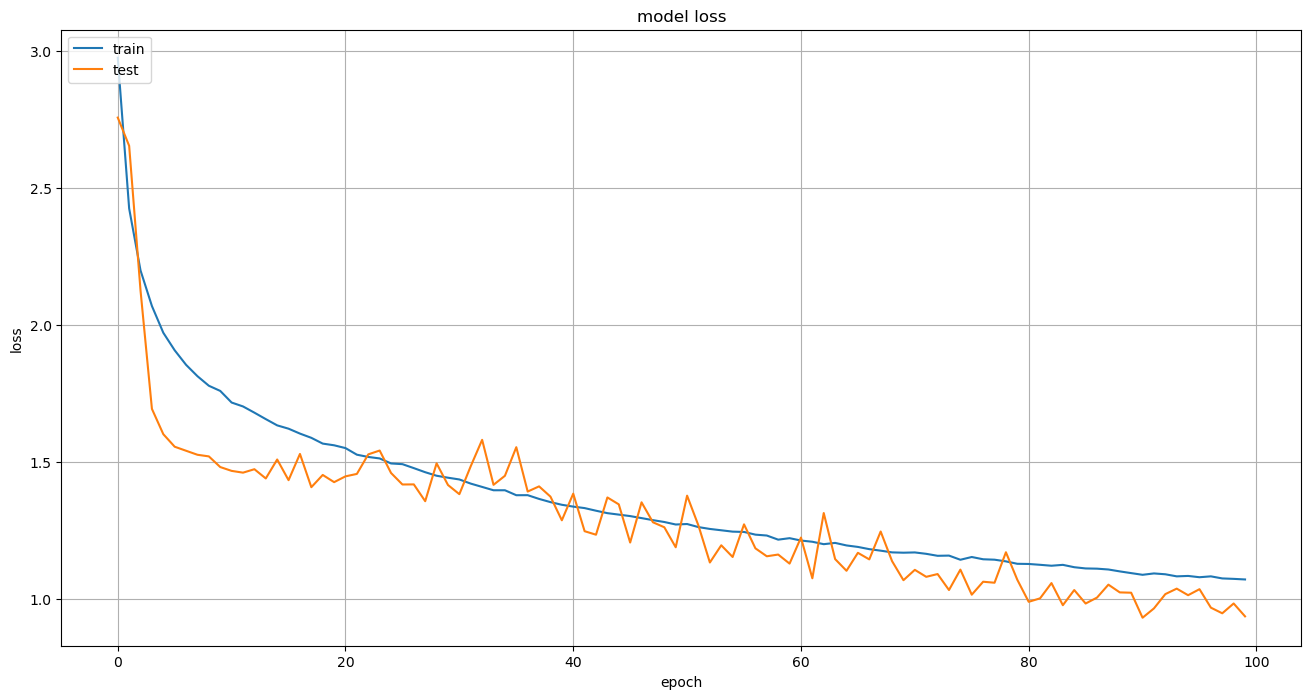

In [10]:
plothist_loss(history)